### Download the markers data from the Cell Markers 2.0

In [8]:
!wget http://117.50.127.228/CellMarker/CellMarker_download_files/file/Cell_marker_All.xlsx 


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
markers = pd.read_excel('data\Cell_marker_All.xlsx')

In [11]:
markers.head()

,species,tissue_class,tissue_type,uberonongology_id,cancer_type,cell_type,cell_name,cellontology_id,marker,Symbol,GeneID,Genetype,Genename,UNIPROTID,technology_seq,marker_source,PMID,Title,journal,year
0,Human,Abdomen,Abdomen,UBERON_0000916,Normal,Normal cell,Macrophage,CL_0000235,MERTK,MERTK,10461.0,protein_coding,"MER proto-oncogene, tyrosine kinase",Q12866,None,Experiment,31982413.0,Peritoneal Level of CD206 Associates With Mort...,Gastroenterology,2020.0
1,Human,Abdomen,Abdomen,UBERON_0000916,Normal,Normal cell,Macrophage,CL_0000235,CD16,FCGR3A,2215.0,protein_coding,Fc fragment of IgG receptor IIIb,O75015,None,Experiment,31982413.0,Peritoneal Level of CD206 Associates With Mort...,Gastroenterology,2020.0
2,Human,Abdomen,Abdomen,UBERON_0000916,Normal,Normal cell,Macrophage,CL_0000235,CD206,MRC1,4360.0,protein_coding,mannose receptor C-type 1,P22897,None,Experiment,31982413.0,Peritoneal Level of CD206 Associates With Mort...,Gastroenterology,2020.0
3,Human,Abdomen,Abdomen,UBERON_0000916,Normal,Normal cell,Macrophage,CL_0000235,CRIg,VSIG4,11326.0,protein_coding,V-set and immunoglobulin domain containing 4,Q9Y279,None,Experiment,31982413.0,Peritoneal Level of CD206 Associates With Mort...,Gastroenterology,2020.0
4,Human,Abdomen,Abdomen,UBERON_0000916,Normal,Normal cell,Macrophage,CL_0000235,CD163,CD163,9332.0,protein_coding,CD163 molecule,Q86VB7,None,Experiment,31982413.0,Peritoneal Level of CD206 Associates With Mort...,Gastroenterology,2020.0


In [14]:
markers['species'].value_counts()

Human    60877
Mouse    35197
Name: species, dtype: int64

In [15]:
human = markers[markers['species'] == 'Human']
mouse = markers[markers['species'] == 'Mouse']

In [17]:
mouse.head()

,species,tissue_class,tissue_type,uberonongology_id,cancer_type,cell_type,cell_name,cellontology_id,marker,Symbol,GeneID,Genetype,Genename,UNIPROTID,technology_seq,marker_source,PMID,Title,journal,year
8,Mouse,Abdomen,Muscle,UBERON_0001630,Normal,Normal cell,Fibro-adipogenic progenitor cell,NaN,Wisp1,Ccn4,22402.0,protein_coding,cellular communication network factor 4,O54775,10x Chromium,Experiment,35439171.0,An estrogen-sensitive fibroblast population dr...,JCI insight,2022.0
9,Mouse,Abdomen,Muscle,UBERON_0001630,Normal,Normal cell,Myoblast,CL_0000056,Myod1,Myod1,17927.0,protein_coding,myogenic differentiation 1,P10085,10x Chromium,Experiment,35439171.0,An estrogen-sensitive fibroblast population dr...,JCI insight,2022.0
10,Mouse,Abdomen,Muscle,UBERON_0001630,Normal,Normal cell,Muscle satellite cell,CL_0000514,Myf5,Myf5,17877.0,protein_coding,myogenic factor 5,A2RSK4,10x Chromium,Experiment,35439171.0,An estrogen-sensitive fibroblast population dr...,JCI insight,2022.0
11,Mouse,Abdomen,Muscle,UBERON_0001630,Normal,Normal cell,Myocyte,CL_0000187,Ckm,Ckm,12715.0,protein_coding,"creatine kinase, muscle",A2RTA0,10x Chromium,Experiment,35439171.0,An estrogen-sensitive fibroblast population dr...,JCI insight,2022.0
12,Mouse,Abdomen,Muscle,UBERON_0001630,Normal,Normal cell,Myocyte,CL_0000187,Acta1,Acta1,11459.0,protein_coding,"actin alpha 1, skeletal muscle",P68134,10x Chromium,Experiment,35439171.0,An estrogen-sensitive fibroblast population dr...,JCI insight,2022.0


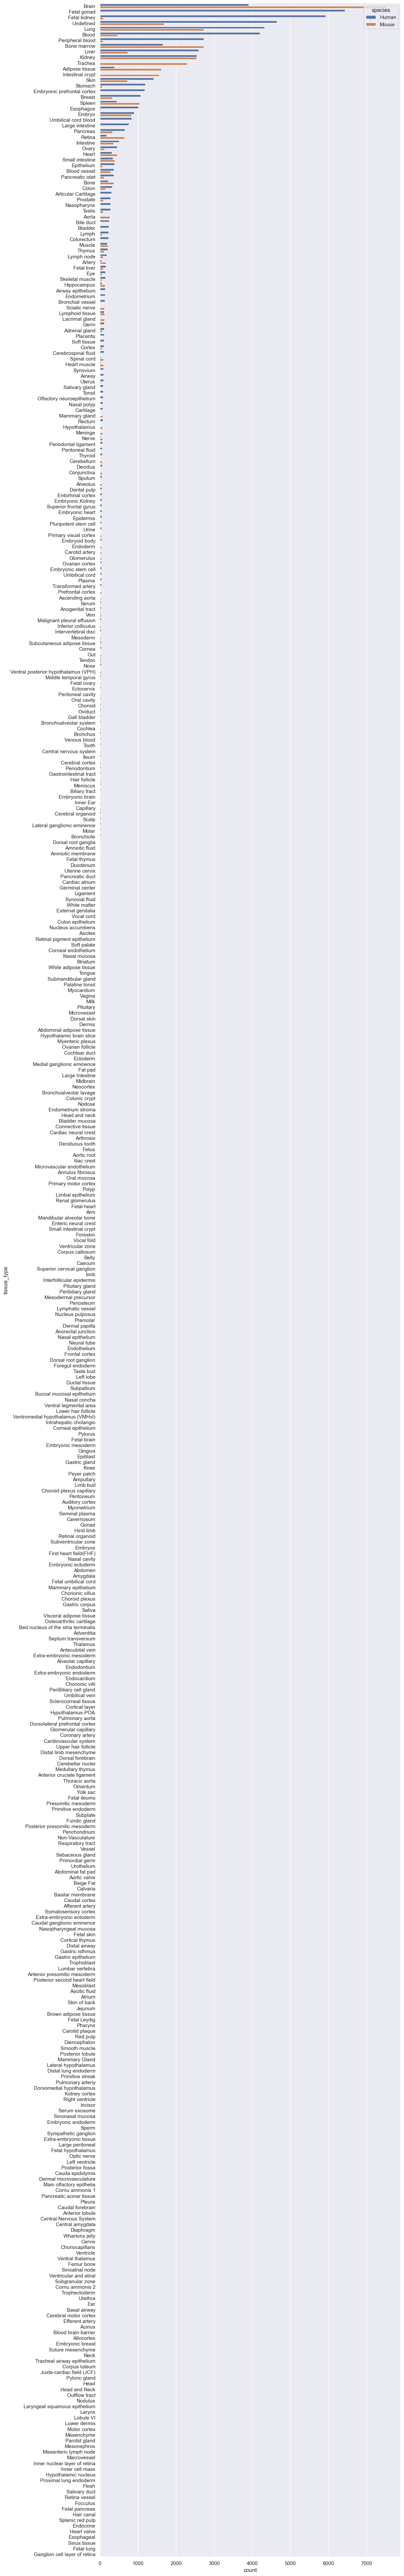

In [32]:
sns.set(rc={'figure.figsize':(8,100)})


# Create a new dataframe with the count of each tissue_type for each species
counts = markers.groupby(['species', 'tissue_type']).size().reset_index(name='counts')

# Sort the new dataframe based on the count of each tissue_type
counts = counts.sort_values('counts', ascending=False).reset_index(drop=True)

# Get a sorted list of unique tissue_types
sorted_tissue_types = list(counts['tissue_type'].unique())

# Plot the sorted countplot
sns.countplot(data=markers, y='tissue_type', hue='species', order=sorted_tissue_types)


plt.show()

In [25]:
counts 

,species,tissue_type,counts
0,Mouse,Brain,7526
1,Human,Fetal gonad,6438
2,Human,Fetal kidney,5927
3,Human,Undefined,4645
4,Human,Lung,4323
...,...,...,...
604,Mouse,Heart valve,1
605,Human,Esophageal,1
606,Human,Sinus tissue,1
607,Human,Fetal lung,1
